In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [414]:
def ft(t, x):
    N = len(x)
    dN = float(N)
    Xmag = np.zeros(N)
#     Xcomp = np.zeros(N, dtype=complex)
    
    dT = (t[1] - t[0])
    Fs = 1.0/dT
    tdur = len(x) * dT
    normfactor = 1/(tdur * Fs)
    
    dk = 0.0
    dn = 0.0
    for k in range(N):
        Xre = 0.0
        Xim = 0.0
        kfactor = (dk*2.0*np.pi)/dN
        dn = 0.0
        for n in range(N):
            q = kfactor*dn
            Xre += x[n]*np.cos(q)/np.sqrt(2) # Real part of X[k], sqrt 2 due to rms amp of sin/cos
            Xim -= x[n]*np.sin(q)/np.sqrt(2) # Imag part of X[k]
            dn += 1.0
        
        Xmag[k] = np.sqrt(Xre*Xre + Xim*Xim) * normfactor
#         Xcomp[k] = Xre[k] * normfactor + 1j*Xim[k] * normfactor
        dk += 1.0
    return Xmag

In [455]:
def noise_spectrum(t, x):
    ftmag = ft(t, x)
    
    N = len(ftmag)
    if N%2 == 0:
        # idx 0 is dc component
        # idx N/2 is nyquist-df
        # idx 1 through N/2-1 are repeated in reverse (same abs) from N/2+1 through N-1
        nsd = ftmag[:int(N/2+1)]
        nsd[1:int(N/2)] = 2.0*nsd[1:int(N/2)] # account for positive and negative components for these
        return nsd
    else:
        raise(Exception('PSD of odd length signal not supported.'))
        

In [416]:
endpt = False

In [452]:
t = np.linspace(0,100,1000+endpt, endpoint=endpt).T
Fs = 1.0/(t[1] - t[0])
fsin = 1

x = np.sqrt(2)*np.sin(2*np.pi*fsin*t + 0*np.pi)
# x += np.random.randn(np.size(t))
x += np.sqrt(2)*np.sin(2*np.pi*2*fsin*t + 0*np.pi)
# x = np.ones(np.size(t))

print('Fs: {}'.format(Fs))
print('Max t: {}'.format(t[-1]))
print('Length t: {} points'.format(len(t)))

Fs: 10.0
Max t: 99.9
Length t: 1000 points


In [453]:
# ftmag = ft(t, x)
noise = noise_spectrum(t, x)

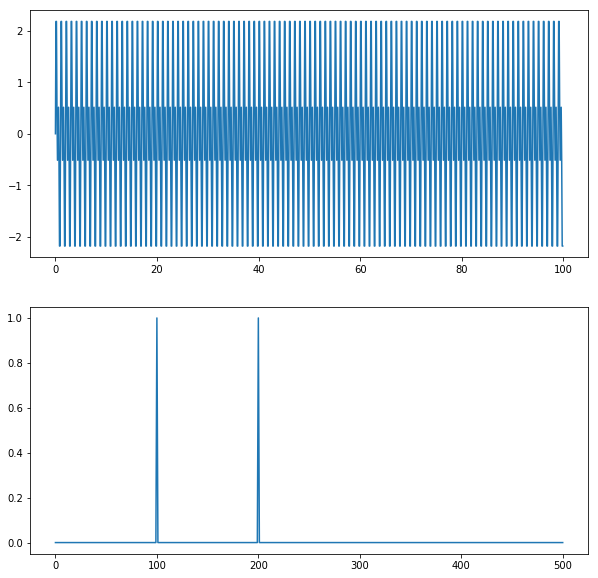

In [454]:
f = plt.figure(figsize=[10,10])
pltinds = range(len(t))

ax1 = plt.subplot(211)
ax1.plot(t, x)

# ax2 = plt.subplot(412)
# ax2.plot(pltinds, ftmag[pltinds])

# ax3 = plt.subplot(413)
# ax3.plot(pltinds, np.real(ftr[pltinds])+1/2)
# ax3.plot(pltinds, np.imag(ftr[pltinds])-1/2)

ax4 = plt.subplot(212)
ax4.plot(noise)
plt.show()

In [285]:
np.absolute(ftr[0:10])

array([2.09465054e-15, 8.35225295e-16, 2.83266673e-16, 2.88511119e-16,
       1.72571399e-15, 2.06985895e-15, 1.22438512e-15, 1.98831895e-15,
       2.01437659e-15, 2.61084701e-15])